In [26]:
import numpy
import flowx 
import simulation
import time
from matplotlib import pyplot

# Dirichlet BC

In [27]:
nx, ny = 50, 50
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0
center_vars = [ 'asol', 'ivar', 'rvar', 'eror' ]
user_bc = 'dirichlet'
bc_type = { 'ivar': [ user_bc, user_bc, user_bc, user_bc ] }
bc_val  = { 'ivar': [ 0.0, 0.0, 0.0, 0.0 ] }
grid = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val )

In [28]:
simulation.get_analytical( grid, 'asol', user_bc )
simulation.get_rhs( grid, 'rvar', user_bc )

In [29]:
start = time.time()
flowx.poisson.solve_direct( grid, 'ivar', 'rvar' )
print( time.time() - start, 'seconds' )

0.5231149196624756 seconds


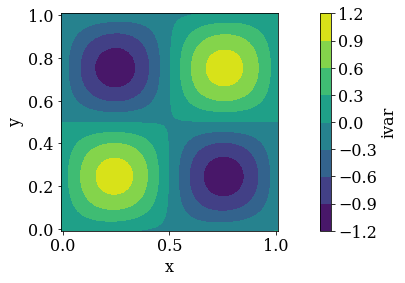

In [30]:
flowx.io.plot_contour( grid, 'ivar' )

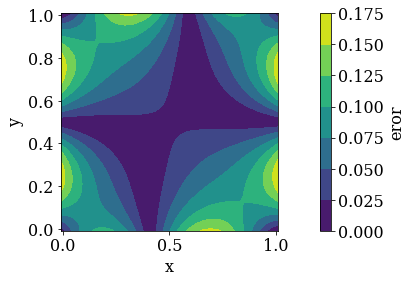

In [31]:
grid.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid, 'eror')

## Refine Grid

In [32]:
nx2, ny2 = 60, 60
grid2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( grid2, 'asol', user_bc)
simulation.get_rhs( grid2, 'rvar', user_bc)

In [33]:
start = time.time()
flowx.poisson.solve_direct( grid2, 'ivar', 'rvar' )
print( time.time() - start, 'seconds' )

0.9476902484893799 seconds


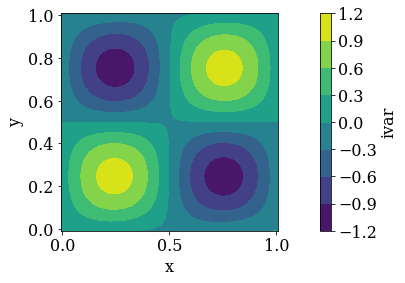

In [34]:
flowx.io.plot_contour( grid2, 'ivar' )

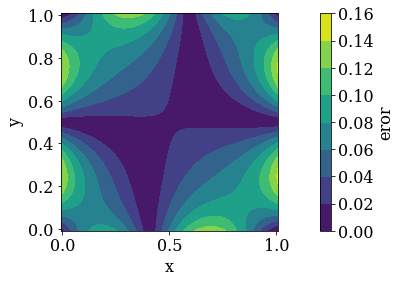

In [35]:
grid2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid2, 'eror')

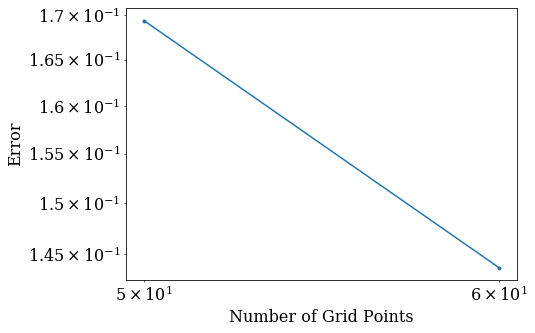

In [36]:
er = [ numpy.max( grid.get_values( 'eror' ) ), numpy.max( grid2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid();

# Neumann BC

In [37]:
user_bc = 'neumann'
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
gridN = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN, 'asol', user_bc)
simulation.get_rhs( gridN, 'rvar', user_bc)

In [38]:
start = time.time()
flowx.poisson.solve_direct( gridN, 'ivar', 'rvar' )
print( time.time() - start, 'seconds' )

0.5863535404205322 seconds


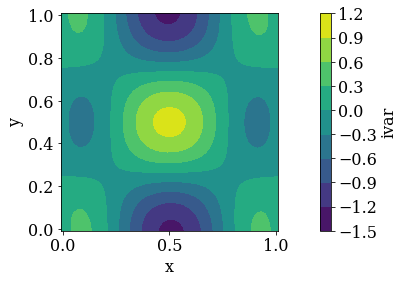

In [39]:
flowx.io.plot_contour( gridN, 'ivar' )

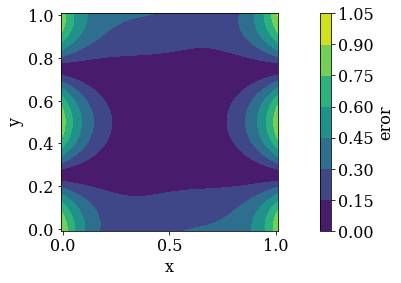

In [40]:
gridN.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN, 'eror')

## Refine Grid

In [41]:
gridN2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN2, 'asol', user_bc)
simulation.get_rhs( gridN2, 'rvar', user_bc)

In [42]:
start = time.time()
flowx.poisson.solve_direct( gridN2, 'ivar', 'rvar' )
print( time.time() - start, 'seconds' )

0.9745690822601318 seconds


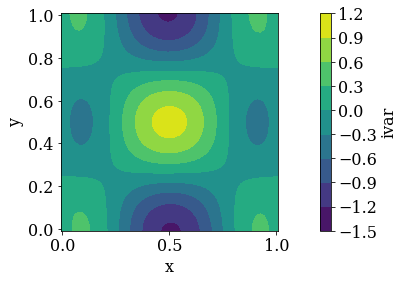

In [43]:
flowx.io.plot_contour( gridN2, 'ivar' )

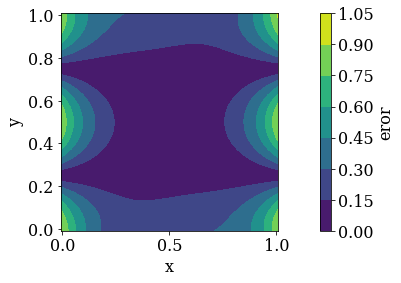

In [44]:
gridN2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN2, 'eror')

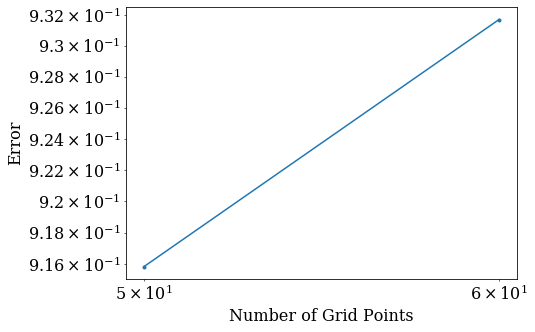

In [45]:
er = [ numpy.max( gridN.get_values( 'eror' ) ), numpy.max( gridN2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid();